In [29]:
import pandas as pd
import numpy as np
from scipy.stats.mstats import mode
from sklearn.cross_validation import train_test_split
from sklearn import cross_validation
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV
from sklearn.linear_model import LinearRegression
import sklearn.model_selection
from sklearn.preprocessing import StandardScaler
from matplotlib import pyplot as plt
% matplotlib inline
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.utils import shuffle

import sklearn
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier

from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier


import statsmodels.api as sm
import statsmodels.formula.api as smf 

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_auc_score

from sklearn.linear_model import Lasso, Ridge, LassoCV, RidgeCV
from sklearn.pipeline import Pipeline

import imblearn.over_sampling

In [30]:
pwd

'/home/ubuntu/Notebooks/lending-club'

In [31]:
df = pd.read_csv('deleted_cols.csv')


In [32]:
df

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,...,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,policy_code,application_type,MORTGAGE,NONE,OWN,RENT
0,0,1077501,1296599,5000.0,5000.0,4975.000000,36,10.65,162.87,B,...,0.00,0.00,0.0000,171.62,1.0,INDIVIDUAL,0,0,0,1
1,1,1077430,1314167,2500.0,2500.0,2500.000000,60,15.27,59.83,C,...,0.00,117.08,1.1100,119.66,1.0,INDIVIDUAL,0,0,0,1
2,2,1077175,1313524,2400.0,2400.0,2400.000000,36,15.96,84.33,C,...,0.00,0.00,0.0000,649.91,1.0,INDIVIDUAL,0,0,0,1
3,3,1076863,1277178,10000.0,10000.0,10000.000000,36,13.49,339.31,C,...,16.97,0.00,0.0000,357.48,1.0,INDIVIDUAL,0,0,0,1
4,4,1075358,1311748,3000.0,3000.0,3000.000000,60,12.69,67.79,B,...,0.00,0.00,0.0000,67.79,1.0,INDIVIDUAL,0,0,0,1
5,5,1075269,1311441,5000.0,5000.0,5000.000000,36,7.90,156.46,A,...,0.00,0.00,0.0000,161.03,1.0,INDIVIDUAL,0,0,0,1
6,6,1069639,1304742,7000.0,7000.0,7000.000000,60,15.96,170.08,C,...,0.00,0.00,0.0000,170.08,1.0,INDIVIDUAL,0,0,0,1
7,7,1072053,1288686,3000.0,3000.0,3000.000000,36,18.64,109.43,E,...,0.00,0.00,0.0000,111.34,1.0,INDIVIDUAL,0,0,0,1
8,8,1071795,1306957,5600.0,5600.0,5600.000000,60,21.28,152.39,F,...,0.00,189.06,2.0900,152.39,1.0,INDIVIDUAL,0,0,1,0
9,9,1071570,1306721,5375.0,5375.0,5350.000000,60,12.69,121.45,B,...,0.00,269.29,2.5200,121.45,1.0,INDIVIDUAL,0,0,0,1


In [33]:
#Delete Unnamed column
df.drop(['Unnamed: 0'], axis=1, inplace=True)

In [34]:
#Conver earliest_cr_line and issue_d to datetime

df['earliest_cr_line'] = pd.to_datetime(df['earliest_cr_line'])

df['issue_d'] = pd.to_datetime(df['issue_d'])

In [35]:
df.shape

(858049, 45)

In [36]:
#The list of columns
df.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_length',
       'home_ownership', 'annual_inc', 'verification_status', 'issue_d',
       'loan_status', 'pymnt_plan', 'url', 'purpose', 'zip_code', 'addr_state',
       'dti', 'earliest_cr_line', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'initial_list_status', 'out_prncp',
       'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp',
       'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_amnt', 'policy_code',
       'application_type', 'MORTGAGE', 'NONE', 'OWN', 'RENT'],
      dtype='object')

To prepare the dataframe for analysis, I will shuffle the data and then use test_train_split.

In [37]:
#Shuffle dataframe
df = shuffle(df, random_state = 1)

In [38]:
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,policy_code,application_type,MORTGAGE,NONE,OWN,RENT
694270,51848807,55278581,20000.0,20000.0,20000.0,36,9.99,645.25,B,B3,...,0.0,0.0,0.0,645.25,1.0,INDIVIDUAL,1,0,0,0
34973,442381,537306,20000.0,20000.0,19050.0,36,14.26,686.12,C,C5,...,0.0,0.0,0.0,18372.64,1.0,INDIVIDUAL,1,0,0,0
226795,37692106,40465191,28000.0,28000.0,28000.0,60,10.49,601.70,B,B3,...,0.0,0.0,0.0,24652.44,1.0,INDIVIDUAL,1,0,0,0
382048,16101417,18203903,6000.0,6000.0,6000.0,36,10.15,194.03,B,B2,...,0.0,0.0,0.0,5315.97,1.0,INDIVIDUAL,0,0,1,0
785277,42673919,45670681,12000.0,12000.0,12000.0,60,16.99,298.17,D,D3,...,0.0,0.0,0.0,298.17,1.0,INDIVIDUAL,1,0,0,0


In [39]:
df.corr()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,annual_inc,dti,...,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,policy_code,MORTGAGE,NONE,OWN,RENT
id,1.000000,0.999434,0.065409,0.067711,0.073203,0.071534,-0.144219,0.025890,0.034185,0.067231,...,-0.455668,-0.077732,-0.115011,-0.073086,-0.227535,NaN,-0.008937,-0.009703,0.038347,-0.014025
member_id,0.999434,1.000000,0.066083,0.068426,0.074029,0.071881,-0.143449,0.026594,0.034360,0.067282,...,-0.454730,-0.078209,-0.115091,-0.073076,-0.226971,NaN,-0.008355,-0.009846,0.038362,-0.014626
loan_amnt,0.065409,0.066083,1.000000,0.999242,0.997052,0.411089,0.142521,0.944925,0.335102,0.020637,...,0.537553,0.024256,0.074872,0.053514,0.233791,NaN,0.192104,-0.000544,-0.020734,-0.183427
funded_amnt,0.067711,0.068426,0.999242,1.000000,0.997986,0.410095,0.142648,0.945983,0.334864,0.021040,...,0.536471,0.023848,0.074411,0.053273,0.233331,NaN,0.191909,-0.000533,-0.020544,-0.183344
funded_amnt_inv,0.073203,0.074029,0.997052,0.997986,1.000000,0.410734,0.142663,0.943562,0.333811,0.022139,...,0.533935,0.020299,0.072472,0.050711,0.232100,NaN,0.191720,-0.000947,-0.020034,-0.183454
term,0.071534,0.071881,0.411089,0.410095,0.410734,1.000000,0.426874,0.143969,0.058948,0.050381,...,0.383700,0.001105,0.058806,0.036891,0.074036,NaN,0.108982,-0.002338,-0.014494,-0.102371
int_rate,-0.144219,-0.143449,0.142521,0.142648,0.142663,0.426874,1.000000,0.130125,-0.073623,0.078458,...,0.446444,0.050666,0.110417,0.073321,0.107251,NaN,-0.060560,0.003117,0.001961,0.060559
installment,0.025890,0.026594,0.944925,0.945983,0.943562,0.143969,0.130125,1.000000,0.328567,0.014322,...,0.502121,0.034251,0.076407,0.055744,0.243415,NaN,0.159762,0.000750,-0.016923,-0.152759
annual_inc,0.034185,0.034360,0.335102,0.334864,0.333811,0.058948,-0.073623,0.328567,1.000000,-0.086619,...,0.130747,0.009986,0.007827,0.006806,0.092570,NaN,0.157110,-0.001289,-0.031553,-0.141136
dti,0.067231,0.067282,0.020637,0.021040,0.022139,0.050381,0.078458,0.014322,-0.086619,1.000000,...,0.008852,-0.006830,0.001501,0.002421,-0.028476,NaN,-0.002926,0.000186,0.014932,-0.006086


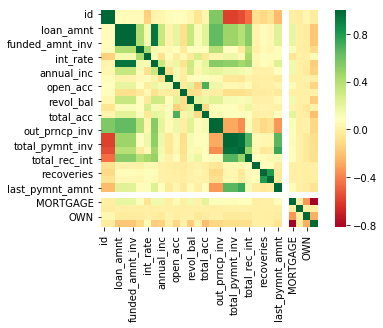

In [40]:
#Correlation Heatmap

sns.heatmap(df.corr(), square=True, cmap='RdYlGn')

In [41]:
df.shape

(858049, 45)

In [42]:
pwd

'/home/ubuntu/Notebooks/lending-club'

#### Analyzing Target

In [43]:
df['loan_status'].value_counts()

Current    810913
Default     47136
Name: loan_status, dtype: int64

In [44]:
loans_df = df['loan_status']
loans_df.head()

694270    Current
34973     Current
226795    Current
382048    Current
785277    Current
Name: loan_status, dtype: object

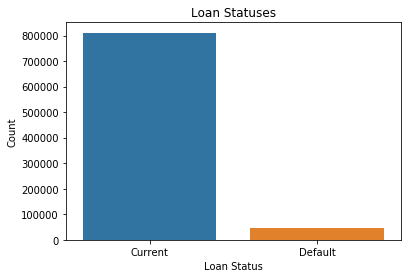

In [45]:
ax = sns.countplot(loans_df)
ax.set(xlabel='Loan Status', ylabel='Count')
plt.title('Loan Statuses')
plt.show()

In [46]:
df.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_length',
       'home_ownership', 'annual_inc', 'verification_status', 'issue_d',
       'loan_status', 'pymnt_plan', 'url', 'purpose', 'zip_code', 'addr_state',
       'dti', 'earliest_cr_line', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'initial_list_status', 'out_prncp',
       'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp',
       'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_amnt', 'policy_code',
       'application_type', 'MORTGAGE', 'NONE', 'OWN', 'RENT'],
      dtype='object')

In [47]:
df.dtypes

id                                  int64
member_id                           int64
loan_amnt                         float64
funded_amnt                       float64
funded_amnt_inv                   float64
term                                int64
int_rate                          float64
installment                       float64
grade                              object
sub_grade                          object
emp_length                         object
home_ownership                     object
annual_inc                        float64
verification_status                object
issue_d                    datetime64[ns]
loan_status                        object
pymnt_plan                         object
url                                object
purpose                            object
zip_code                           object
addr_state                         object
dti                               float64
earliest_cr_line           datetime64[ns]
open_acc                          

In [48]:
df['loan_status'].unique()

array(['Current', 'Default'], dtype=object)

In [49]:
#Assign numeric values to loan statuses

df['loan_status'] = df['loan_status'].replace({'Current': 0, 'Default': 1})

### Define Variables - Using Features that were relevant before the loan was issued



In [50]:
X = df[['id', 'member_id', 'int_rate', 'installment', 'loan_amnt', 'annual_inc', 'dti',
       'revol_bal', 'revol_util', 'total_acc', 'open_acc', 'term', 'pub_rec', 'MORTGAGE', 'NONE', 'OWN', 'RENT']]


y = df['loan_status']

Text(0.5,1,'Heatmap of Features')

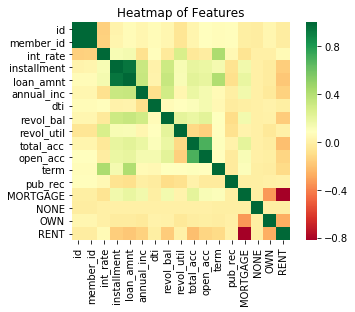

In [51]:
sns.heatmap(X.corr(), square=True, cmap='RdYlGn').set_title('Heatmap of Features')


In [52]:
#Test_train_split
X_train, X_test, y_train, y_test = cross_validation.train_test_split(X, y, test_size=0.20, random_state=1)

## Random Forest with Oversampling and Cross Validation - Best Random Forest Model

In [53]:
ROS = imblearn.over_sampling.RandomOverSampler(ratio=.4, random_state=42) 
    
X_tr_rs, y_tr_rs = ROS.fit_sample(X_train, y_train)


rf = RandomForestClassifier().fit(X_tr_rs, y_tr_rs)
y_pred = rf.predict(X_test)
print(np.mean(cross_val_score(rf, X_test, y_test, cv=5)))
print(classification_report(y_test, y_pred))

/home/ubuntu/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function _ratio_float is deprecated; Use a float for 'ratio' is deprecated from version 0.2. The support will be removed in 0.4. Use a dict, str, or a callable instead.
  warnings.warn(msg, category=DeprecationWarning)


0.943429867318
             precision    recall  f1-score   support

          0       0.95      0.99      0.97    162159
          1       0.23      0.03      0.06      9451

avg / total       0.91      0.94      0.92    171610



In [54]:
rf = RandomForestClassifier().fit(X_tr_rs, y_tr_rs)
for name, importance in zip(X, rf.feature_importances_):
    print(name, "=", importance)



id = 0.126544460294
member_id = 0.19863047945
int_rate = 0.110743227439
installment = 0.0683215011864
loan_amnt = 0.0529294735173
annual_inc = 0.0725616419267
dti = 0.0797083895814
revol_bal = 0.0778740813398
revol_util = 0.07717552533
total_acc = 0.0589663039725
open_acc = 0.0473352602927
term = 0.00611147448864
pub_rec = 0.00768856660287
MORTGAGE = 0.00552522120311
NONE = 1.90831402726e-05
OWN = 0.00406337605626
RENT = 0.00580193417913


In [56]:
#Trying to play with parameters
ROS = imblearn.over_sampling.RandomOverSampler(ratio=.4, random_state=42) 
    
X_tr_rs, y_tr_rs = ROS.fit_sample(X_train, y_train)


rf = RandomForestClassifier(n_estimators=20, max_depth=5).fit(X_tr_rs, y_tr_rs)
y_pred = rf.predict(X_test)
print(np.mean(cross_val_score(rf, X_test, y_test, cv=5)))
print(classification_report(y_test, y_pred))

/home/ubuntu/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function _ratio_float is deprecated; Use a float for 'ratio' is deprecated from version 0.2. The support will be removed in 0.4. Use a dict, str, or a callable instead.
  warnings.warn(msg, category=DeprecationWarning)


0.944927451931
             precision    recall  f1-score   support

          0       0.96      0.91      0.94    162159
          1       0.20      0.37      0.26      9451

avg / total       0.92      0.88      0.90    171610



## Random Forest with Balanced Class Weights and Cross Validation

1. Just for reference, I used an RF model that did not account for imbalance

In [280]:
#Imbalanced, No CV

rf = RandomForestClassifier().fit(X_train, y_train)
y_pred = rf.predict(X_test)
print('Random Forest accuracy: %.4f' % accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Random Forest accuracy: 0.9437
             precision    recall  f1-score   support

          0       0.95      1.00      0.97    162159
          1       0.28      0.01      0.03      9451

avg / total       0.91      0.94      0.92    171610



2. For the following RF model, I set class_weight to 'balanced.'

In [281]:
#With balanced class weights and Cross Validation
#Accuracy


rf = RandomForestClassifier(class_weight='balanced').fit(X_train, y_train)
y_pred = rf.predict(X_test)
print(np.mean(cross_val_score(rf, X_test, y_test, cv=5)))


0.944030066461


In [282]:
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.95      1.00      0.97    162159
          1       0.24      0.01      0.01      9451

avg / total       0.91      0.94      0.92    171610



## F1 Optimization on Oversampled Data

Random Forest Model best F1 score 0.225 at prob decision threshold >= 0.113


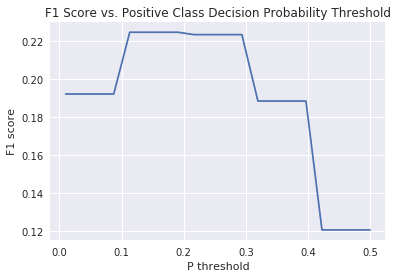

In [283]:
#Using over-sampled training data 

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

rf = RandomForestClassifier().fit(X_tr_rs, y_tr_rs)



X_val, y_val = X_test, y_test # explicitly calling this validation since we're using it for selection

thresh_ps = np.linspace(.01,.50,20)
model_val_probs = rf.predict_proba(X_val)[:,1] # positive class probs, same basic logistic model we fit in section 2 

f1_scores = []
for p in thresh_ps:
    model_val_labels = model_val_probs >= p
    f1_scores.append(f1_score(model_val_labels, y_val))
    
plt.plot(thresh_ps, f1_scores)
plt.title('F1 Score vs. Positive Class Decision Probability Threshold')
plt.xlabel('P threshold')
plt.ylabel('F1 score')

best_f1_score = np.max(f1_scores) 
best_thresh_p = thresh_ps[np.argmax(f1_scores)]

print('Random Forest Model best F1 score %.3f at prob decision threshold >= %.3f' 
      % (best_f1_score, best_thresh_p))

## F1 Optimization on Imbalanced Data

Random Forest Model best F1 score 0.223 at prob decision threshold >= 0.113


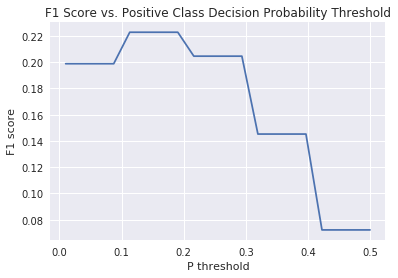

In [295]:
#Using imbalanced training data

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

rf = RandomForestClassifier().fit(X_train, y_train)



X_val, y_val = X_test, y_test # explicitly calling this validation since we're using it for selection

thresh_ps = np.linspace(.01,.50,20)
model_val_probs = rf.predict_proba(X_val)[:,1] # positive class probs, same basic logistic model we fit in section 2 

f1_scores = []
for p in thresh_ps:
    model_val_labels = model_val_probs >= p
    f1_scores.append(f1_score(model_val_labels, y_val))
    
plt.plot(thresh_ps, f1_scores)
plt.title('F1 Score vs. Positive Class Decision Probability Threshold')
plt.xlabel('P threshold')
plt.ylabel('F1 score')

best_f1_score = np.max(f1_scores) 
best_thresh_p = thresh_ps[np.argmax(f1_scores)]

print('Random Forest Model best F1 score %.3f at prob decision threshold >= %.3f' 
      % (best_f1_score, best_thresh_p))

## Random Forest to get best Coefficients

In [284]:
#to delete?? - only in here to find most important coefficients

rf = RandomForestClassifier().fit(X_tr_rs, y_tr_rs)
y_pred = rf.predict(X_test)
print(np.mean(cross_val_score(rf, X_test, y_test, cv=5)))


0.943330805322


In [285]:
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.95      0.99      0.97    162159
          1       0.23      0.03      0.05      9451

avg / total       0.91      0.94      0.92    171610



In [286]:

sorted(zip(X.columns,abs(rf.feature_importances_)), key=lambda x: -x[1])

[('id', 0.18125792664346971),
 ('member_id', 0.14543975059678702),
 ('int_rate', 0.10827266454276492),
 ('dti', 0.079766236519190167),
 ('revol_bal', 0.07838726203142124),
 ('revol_util', 0.076577259488032484),
 ('annual_inc', 0.072424743731103303),
 ('installment', 0.068851618055938563),
 ('total_acc', 0.058902935589854252),
 ('loan_amnt', 0.052827633058545084),
 ('open_acc', 0.04792397107204361),
 ('pub_rec', 0.0079368225590963661),
 ('term', 0.0060725423902712123),
 ('RENT', 0.0057832377229688888),
 ('MORTGAGE', 0.0053557684787279335),
 ('OWN', 0.0041971989181406235),
 ('NONE', 2.2428601644613581e-05)]

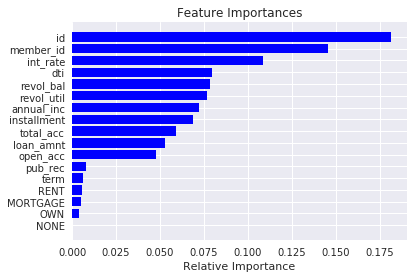

In [287]:
features = X.columns
importances = rf.feature_importances_
indices = np.argsort(importances)

plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), features[indices])
plt.xlabel('Relative Importance')
plt.show()

## ROC Curve

/home/ubuntu/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function _ratio_float is deprecated; Use a float for 'ratio' is deprecated from version 0.2. The support will be removed in 0.4. Use a dict, str, or a callable instead.
  warnings.warn(msg, category=DeprecationWarning)


Text(0,0.5,'True Positive Rate')

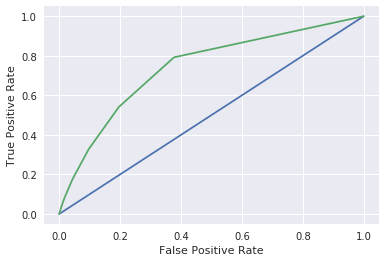

In [289]:
from sklearn.metrics import roc_curve, auc

ROS = imblearn.over_sampling.RandomOverSampler(ratio=.4, random_state=42) 
    
X_tr_rs, y_tr_rs = ROS.fit_sample(X_train, y_train)

rf = RandomForestClassifier()
rf.fit(X_tr_rs,np.ravel(y_tr_rs))
y_score=rf.predict_proba(X_test)[:,1]

fpr, tpr,_ = roc_curve(y_test, y_score)
roc_auc = auc(fpr, tpr)

plt.figure()
# Plotting our Baseline..
plt.plot([0,1],[0,1])
plt.plot(fpr,tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')